In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yahooquery import Ticker

In [2]:
class Bolsa():  # defino la clase bolsa
    def __init__(self, nombre=None):
        self.file = open(nombre or 'ibex', "r") #lee el archivo de los nombres de las acciones
        self.__getTicker() #llama al metodo para obtener los detalles de las acciones
        self.__generateTablaAcciones() #llama al metodo que genera la tabla de las acciones

    def __getTicker(self): #metodo que obtiene los detalles de las acciones
        nomenclaturas = [l.split()[0] for l in self.file] #crea una lista con los nombres de las acciones
        # obtiene los datos de las acciones (todas al mismo tiempo)
        self.acciones = Ticker(nomenclaturas, asynchronous=True)

    def __generateTablaAcciones(self): #metodo que genera la tabla de acciones
        df = []
        for s in self.acciones.symbols:
            a = self.acciones.price[s]
            df.append([a['symbol'], a['shortName'], a['regularMarketPrice']])
        #guardo el dataframe con los datos de las acciones
        self.dfAcciones = pd.DataFrame(
            df, columns=['Acción', 'Nombre', 'Valor'])
            
    def getTablaAcciones(self): #metodo que devuelve el dataframe de acciones
        return self.dfAcciones
       
    def graficarAccionesHistoricas(self): #método que grafica el valor historico de las acciones
        periodo = self.acciones.history(period='1mo', interval='1d')
        
        fig, _ = plt.subplots(nrows=7, ncols=5, figsize=(30, 30))
        fig.suptitle('Gráficos de valor hasta la actualidad', fontsize=16)
        i = 1
        for data in self.acciones.symbols:
            axe = plt.subplot(7, 5, i)
            axe.set_title(self.acciones.price[data]['shortName'])
            periodo.loc[data].plot(kind='line', y='close', ax=axe)
            i += 1
        fig.tight_layout(pad=2.0)


In [3]:
bolsa = Bolsa() #creo un objeto bolsa

In [4]:
bolsa.getTablaAcciones() #obtengo la tabla de acciones

,Acción,Nombre,Valor
0,ANA.MC,"ACCIONA, S.A.",167.1000
1,ACX.MC,"ACERINOX, S.A.",11.9950
2,ACS.MC,"ACS,ACTIVIDADES DE CONSTRUCCION",22.6300
3,AENA.MC,"AENA, S.M.E., S.A.",143.0500
4,ALM.MC,ALMIRALL S.A.,12.8200
5,AMS.MC,"AMADEUS IT GROUP, S.A.",57.2000
6,MTS.MC,ARCELORMITTAL SA,28.9500
7,SAN.MC,BANCO SANTANDER S.A.,3.2805
8,SAB.MC,BANCO DE SABADELL,0.6840
9,BKT.MC,"BANKINTER, S.A.",4.7670


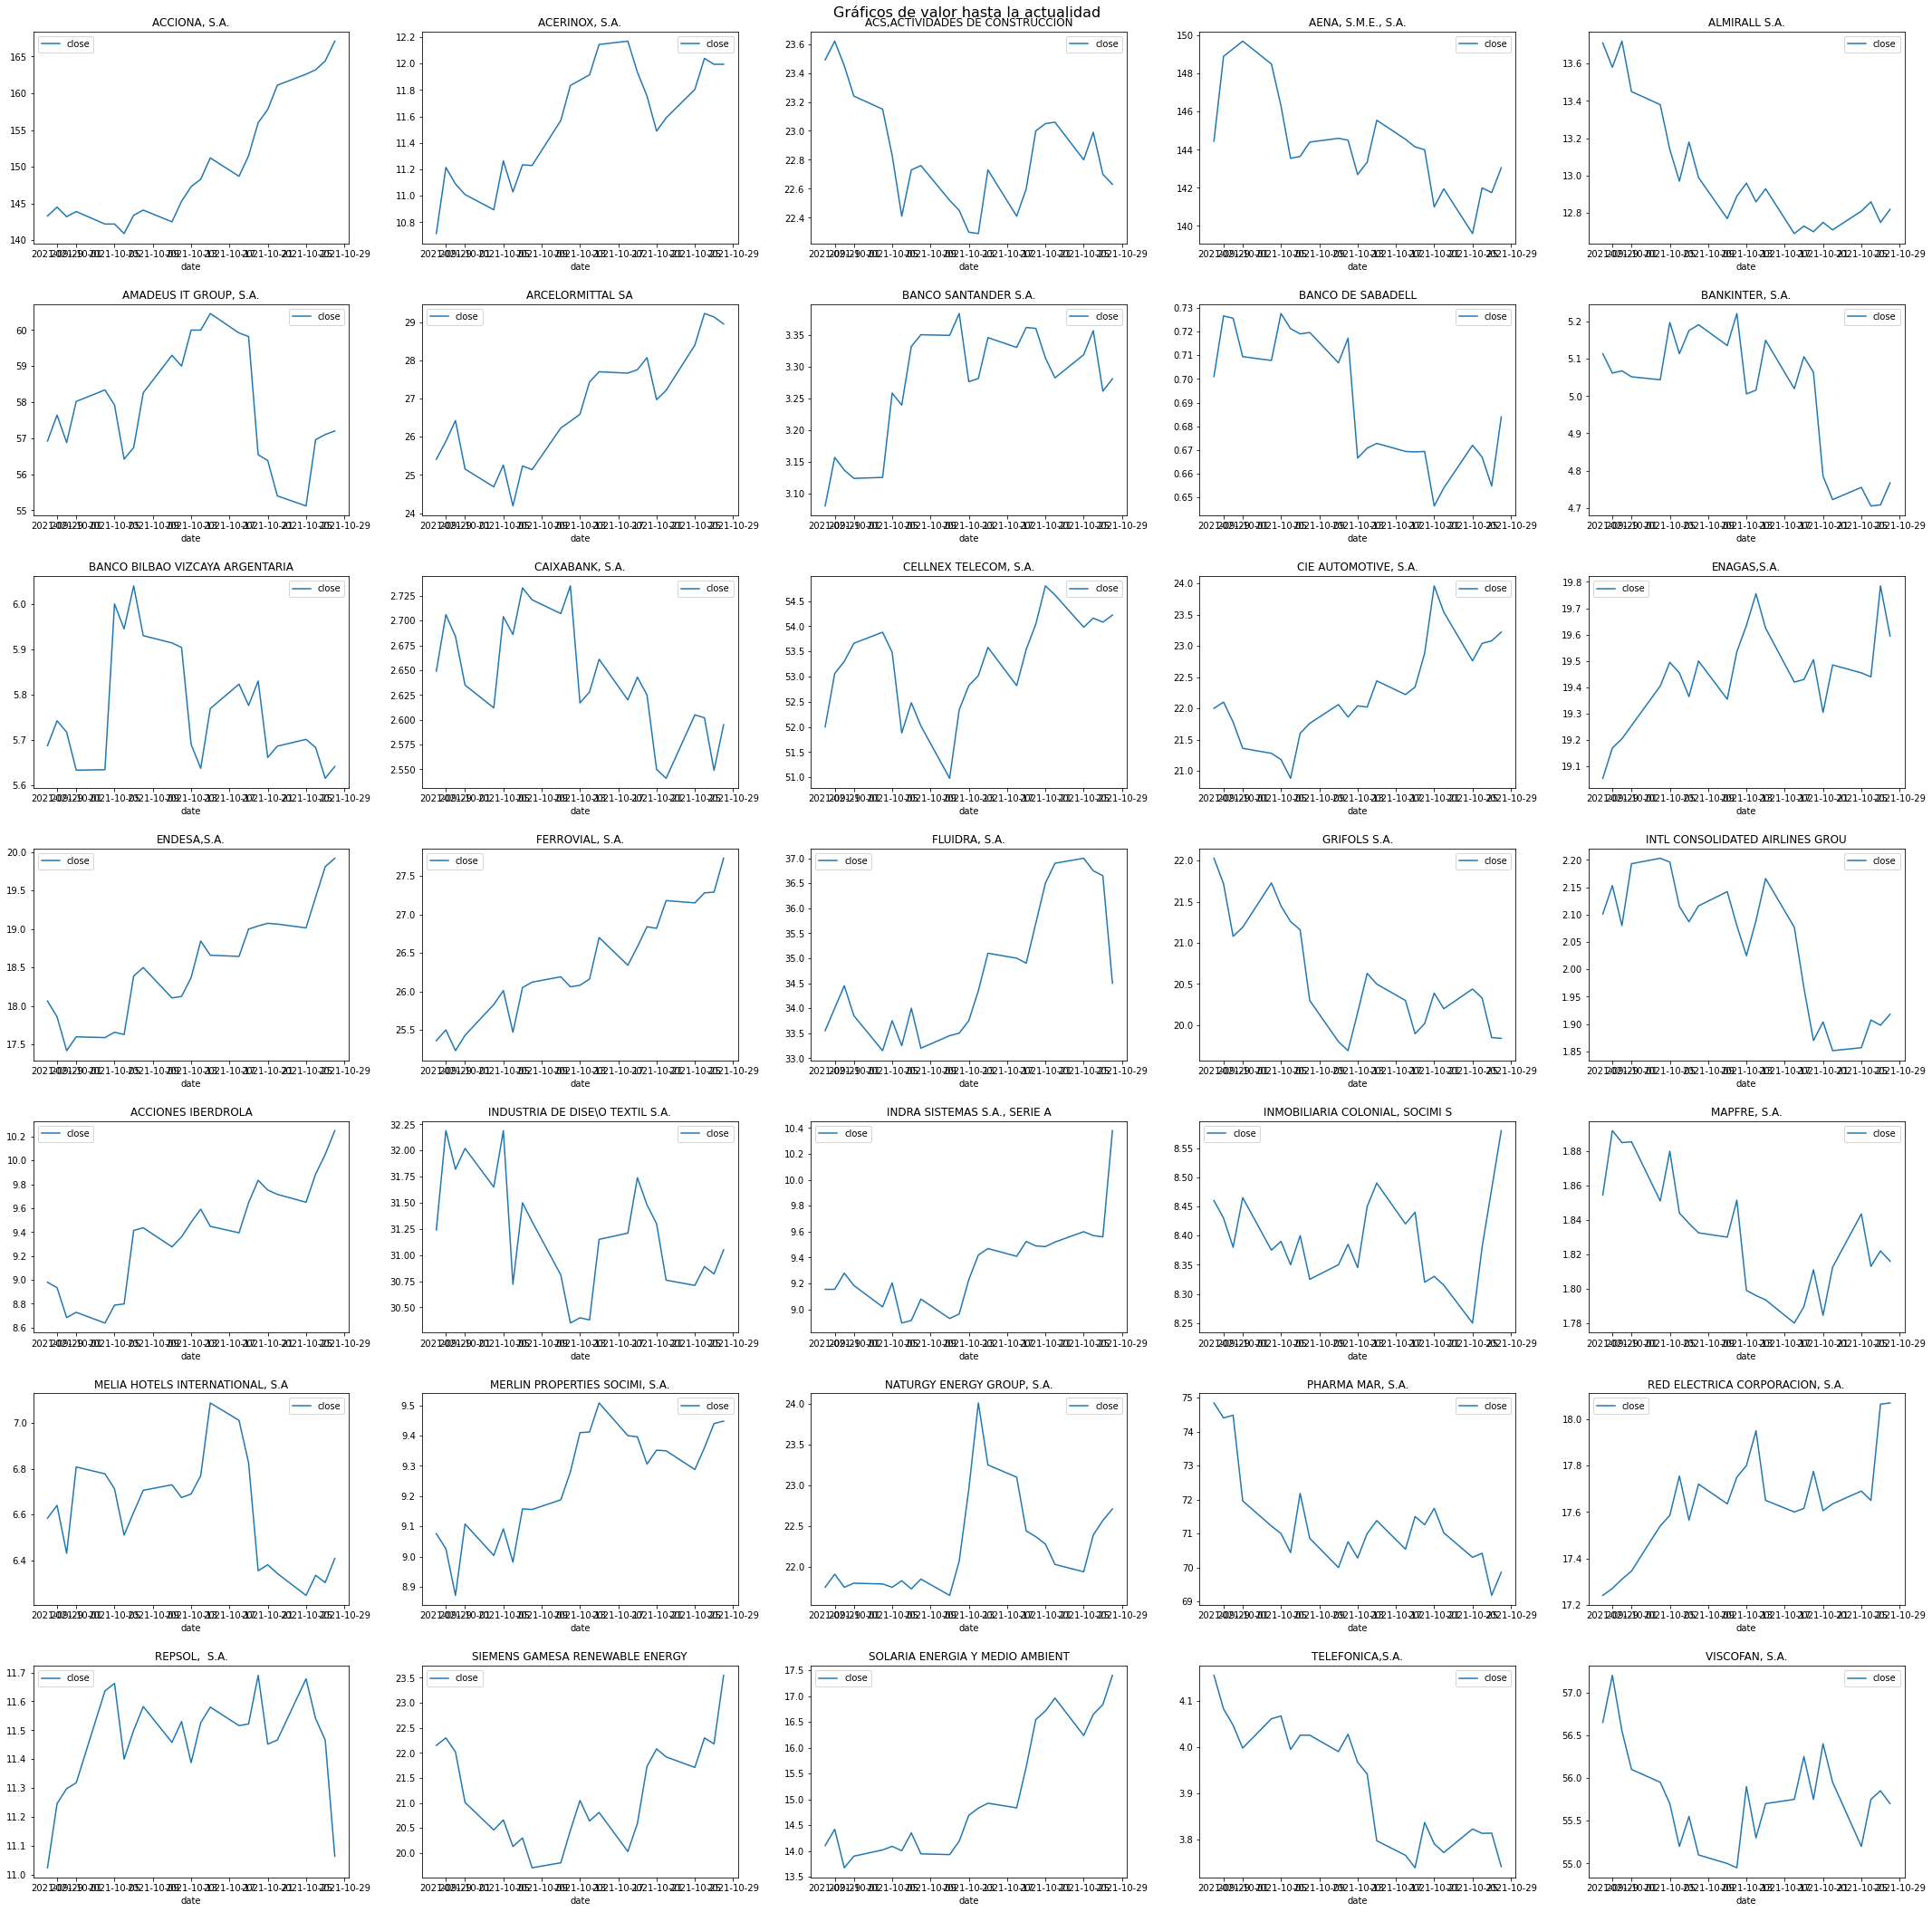

In [5]:
bolsa.graficarAccionesHistoricas() #grafico el valor historico de las acciones